In [1]:
from __future__ import division, print_function
import numpy as np
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

1. Support Vector Classification
================================


1.1 Load the Iris dataset
---------------

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

1.2 Use Support Vector Machine with different kinds of kernels and evaluate performance
------------------------------------------------------------------

In [3]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    misclassifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            misclassifications += 1
    accuracy = 100*misclassifications/len(y_test) #Accuracy as a percentage
    return accuracy

In [4]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

84.2105263158 % accuracy obtained with kernel = linear
81.5789473684 % accuracy obtained with kernel = poly
84.2105263158 % accuracy obtained with kernel = rbf


1.3 Visualize the decision boundaries
-------------------------------------

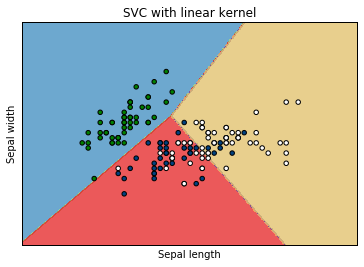

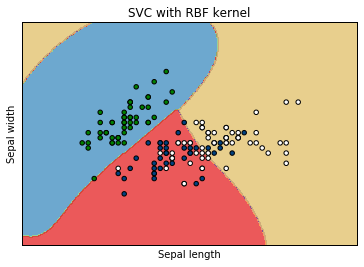

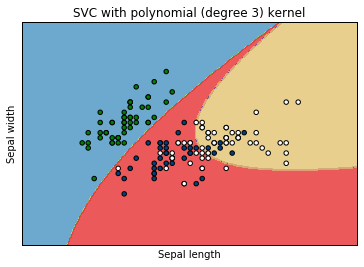

In [5]:
#Train SVMs with different kernels
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

2. Support Vector Regression
============================

2.1 Load data from the Boston dataset
-------------------------------------

In [6]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2.2 Use Support Vector Machine with different kinds of kernels and evaluate performance
----------------------------------

In [7]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i]-y_test[i]) **2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error) #Accuracy as a percentage
    return RMSE

In [8]:
kernels = ('linear','rbf')
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=5.30510081135 obtained with kernel = linear
RMSE=8.28026482035 obtained with kernel = rbf
